In [5]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import datetime

import sys
sys.path.insert(1, '../src/')

from SEIR_exams_measures import *


In [81]:
minsal = True
if minsal:
    df = pd.read_csv ("../data/COVID_Chile_Regiones.csv")
    df = df.dropna(subset = ["Region"])
    df["Fecha_dt"] = pd.to_datetime (df["Fecha"])
    df["Fecha_dt"][df["Fecha_dt"] >= '2020-03-18'] -=  pd.Timedelta(hours=12)

    df = df[(df["Region"] == "Ñuble") & (df["Contagiados"] > 0)]
    i_data = df["Contagiados"].values
    df = df[(df["Region"] == "Ñuble") & (df["Contagiados"] > 50)]
else:
    df = pd.read_excel("../data/Ñuble.xls")
    df["Fecha_dt"] = pd.to_datetime (df["Fecha"])
    i_data = df["Contagiados"].values
    df = df[df.Contagiados > 50]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [82]:
df = df.reset_index(drop=True)

In [83]:
df

,Region,Contagiados,Muertes,Recuperados,Infectados_Actuales,Fecha,Total_Contagiados,Fecha_dt
0,Ñuble,58,0,0,58,3/21/2020,NaN,2020-03-20 12:00:00
1,Ñuble,64,0,0,64,3/22/2020,NaN,2020-03-21 12:00:00
2,Ñuble,81,0,0,81,3/23/2020,NaN,2020-03-22 12:00:00
3,Ñuble,105,0,0,105,3/24/2020,NaN,2020-03-23 12:00:00
4,Ñuble,111,0,0,111,3/25/2020,NaN,2020-03-24 12:00:00
5,Ñuble,114,0,1,113,3/26/2020,NaN,2020-03-25 12:00:00
6,Ñuble,144,0,2,142,3/27/2020,NaN,2020-03-26 12:00:00
7,Ñuble,172,0,4,168,3/28/2020,NaN,2020-03-27 12:00:00
8,Ñuble,197,0,4,193,3/29/2020,NaN,2020-03-28 12:00:00
9,Ñuble,229,0,12,217,3/30/2020,NaN,2020-03-29 12:00:00


In [166]:
i_cuar = 10
i_cuar = 14

print (df.Fecha.iloc[i_cuar])

i_cuar2 = [df.index[df.Fecha == "3/30/2020"][0]+3, 
          df.index[df.Fecha == "4/23/2020"][0]]
print (i_cuar2)
print (df.Fecha.iloc[i_cuar2])
t_data = np.arange(len(df.Infectados_Actuales))
C_real = df.Contagiados.values
I_real = df.Infectados_Actuales.values
R_real = df.Recuperados.values + df.Muertes.values



4/4/2020
[12, 33]
12     4/2/2020
33    4/23/2020
Name: Fecha, dtype: object


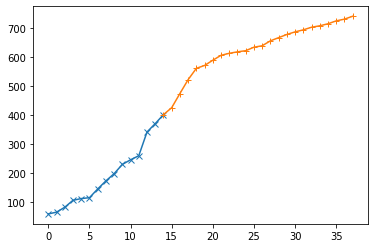

In [167]:
plt.plot(t_data[:i_cuar+1], C_real [:i_cuar+1], marker = "x")
plt.plot(t_data[i_cuar:], C_real [i_cuar:], marker = "+")


In [168]:
pop = 511551

# Ajuste a primeros días
r0 =  19 
e0 =  22 
i0 =  31

s0 = pop - i0 - r0 - e0
c0 = C_real[0]


In [171]:
#[8.486029477192394, array([7.e-07, 1.e-14]), 0.5, 0.125, 50.0, 0.1, 0.4] 2.0 8.0
#[12.020757851191542, array([8.e-07, 1.e-07, 5.e-07]), 
# 0.5, 0.16666666666666666, 40.0, 0.03162277660168379, 0.30000000000000004]
trans_coeffs = []
trans_coeffs.append(np.array([8e-7]))
trans_coeffs.append(np.array([1e-7]))
trans_coeffs.append(np.array([1e-7, 1.6e-7, 1.7e-7, 2e-7, 3e-7, 4e-7, 5e-7, 6e-7]))
print (trans_coeffs)

[array([8.e-07]), array([1.e-07]), array([1.0e-07, 1.6e-07, 1.7e-07, 2.0e-07, 3.0e-07, 4.0e-07, 5.0e-07,
       6.0e-07])]


4.895477023965976e-07
0.6871168953272974 
0.05555556343557843 
56.08000441355646 
0.09999472332437251 
0.3856258452621279

In [172]:
min_ = GridSearchSEIR_exams_measures (t_data, s0, e0, i0, r0, c0, c0, C_real, i_dates_betas = i_cuar2,
                                      transmission_coeffs = trans_coeffs, # 1 / day person                                                              
                                      latency_time = np.arange(1., 7., 1.), # days                                                                                                               
                                      infectious_time = np.arange(6., 18, 2.), # days                                                                                                            
                                      ks = 10**np.linspace(-2, 0, 5),
                                      a_dates = np.linspace (20, 80, 4),
                                      a_s = np.linspace(0.1, .9, 9), backward = True)


{'b0': array([8.e-07]), 'b1': array([1.e-07]), 'b2': array([1.0e-07, 1.6e-07, 1.7e-07, 2.0e-07, 3.0e-07, 4.0e-07, 5.0e-07,
       6.0e-07])}
betas =  [8.e-07 1.e-07 1.e-07] 21.507854223251343
  min: RMSE =  13.185246936207585 ; b, s, g =  [array([8.e-07, 1.e-07, 1.e-07]), 0.3333333333333333, 0.125] ; a_d, k, a =  [60.0, 0.01, 0.5] ; ( 3.0 ,  8.0 )
betas =  [8.0e-07 1.0e-07 1.6e-07] 20.35427212715149
  min: RMSE =  13.07705583142758 ; b, s, g =  [array([8.0e-07, 1.0e-07, 1.6e-07]), 0.3333333333333333, 0.125] ; a_d, k, a =  [60.0, 0.01, 0.5] ; ( 3.0 ,  8.0 )
betas =  [8.0e-07 1.0e-07 1.7e-07] 19.748671054840088
  min: RMSE =  13.062015645970984 ; b, s, g =  [array([8.0e-07, 1.0e-07, 1.7e-07]), 0.3333333333333333, 0.125] ; a_d, k, a =  [60.0, 0.01, 0.5] ; ( 3.0 ,  8.0 )
betas =  [8.e-07 1.e-07 2.e-07] 19.075050115585327
  min: RMSE =  13.022321025355476 ; b, s, g =  [array([8.e-07, 1.e-07, 2.e-07]), 0.3333333333333333, 0.125] ; a_d, k, a =  [60.0, 0.01, 0.5] ; ( 3.0 ,  8.0 )
betas =  [8.e

In [173]:
S_c_g, E_c_g, I_c_g, R_c_g, C_c_g, C_m_g = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            i_cuar3, betas_g, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)
print (min_[3]/S_c_g[i_cuar2[-1]])
print (min_[3]/s0)

2.4474262579409625e-07
2.443893102160597e-07


In [174]:
RMSE, betas_g, sigma_g, gamma_g, a_date_g, k_g, a_g = min_
print (min_, 1./sigma_g, 1/gamma_g)
i_cuar3 = i_cuar2
# [12.020757851191542, array([8.e-07, 1.e-07, 5.e-07]), 0.5, 0.16666666666666666, 40.0, 0.03162277660168379, 0.3]
#[8.486029477192394, array([7.e-07, 1.e-14]), 0.5, 0.125, 50.0, 0.1, 0.4] 2.0 8.0
#betas_g, sigma_g, gamma_g, a_date_g, k_g, a_g = np.array([7.e-07, 1.e-14, 7.e-07]), 0.5, 0.125, 50.0, 0.1, 0.4
#i_cuar3 = i_cuar2[:2]

[12.953268281789375, array([8.e-07, 1.e-07, 3.e-07]), 0.3333333333333333, 0.125, 60.0, 0.01, 0.5] 3.0 8.0


In [175]:
ts = np.arange (0, 100, 1)
i_ini = len(i_data) - len(I_real)
x_plot_data = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in t_data.astype(float)])

x_plot_proy = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in np.arange(len(ts), dtype = float)])

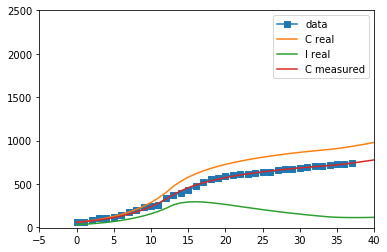

In [178]:

S_c_g, E_c_g, I_c_g, R_c_g, C_c_g, C_m_g = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            i_cuar3, betas_g, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)

plt.plot (t_data, C_real, label = "data", marker = "s")
plt.plot (ts, C_c_g, label = "C real")
plt.plot (ts, I_c_g, label = "I real")
plt.plot (ts, C_m_g, label = "C measured")

plt.xlim(-5, 40)
plt.ylim(-5, 2500)
plt.legend()


511479


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


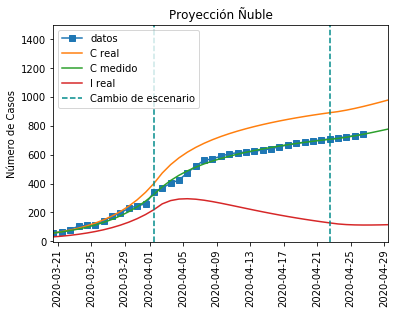

In [189]:
print (s0)
ts = np.arange (0, 100, 1)
S_c_g, E_c_g, I_c_g, R_c_g, C_c_g, C_m_g = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            i_cuar3, betas_g, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)

plt.plot (x_plot_data, C_real, label = "datos", marker = "s")
plt.plot (x_plot_proy, C_c_g, label = "C real")
plt.plot (x_plot_proy, C_m_g, label = "C medido")
plt.plot (x_plot_proy, I_c_g, label = "I real")
plt.axvline (x_plot_proy[i_cuar2[0]], ls = "--", label = "Cambio de escenario", c = "darkcyan")
for i in range (1, len(i_cuar2)):
    plt.axvline (x_plot_proy[i_cuar2[i]], ls = "--", c = "darkcyan")
plt.xlim (x_plot_proy[0], x_plot_proy[40])
plt.ylim (-5, 1500)
plt.xticks(rotation = 90)
plt.ylabel ("Número de Casos")
plt.title ("Proyección Ñuble")
plt.legend(loc = "upper left")

plt.savefig('Nuble_1.eps', format='eps')

511479


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


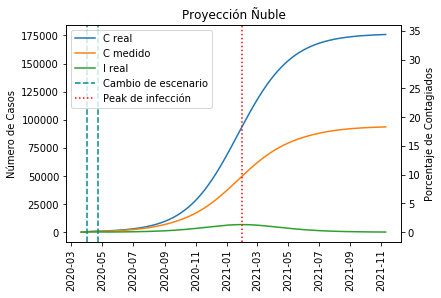

In [203]:
print (s0)
ts = np.arange (0, 600, 1)
x_plot_data = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in t_data.astype(float)])

x_plot_proy = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in np.arange(len(ts), dtype = float)])
 
S_c_g, E_c_g, I_c_g, R_c_g, C_c_g, C_m_g = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            i_cuar3, betas_g, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)

#plt.plot (x_plot_data, C_real, label = "datos", marker = "s")
plt.plot (x_plot_proy, C_c_g, label = "C real")
plt.plot (x_plot_proy, C_m_g, label = "C medido")
plt.plot (x_plot_proy, I_c_g, label = "I real")
plt.axvline (x_plot_proy[i_cuar2[0]], ls = "--", label = "Cambio de escenario", c = "darkcyan")
for i in range (1, len(i_cuar2)):
    plt.axvline (x_plot_proy[i_cuar2[i]], ls = "--", c = "darkcyan")
    
plt.axvline (x_plot_proy[I_c_g.argmax()], ls = ":", c = "red", label = "Peak de infección")
#plt.xlim (x_plot_proy[0], x_plot_proy[40])
plt.xticks(rotation = 90)
plt.ylabel ("Número de Casos")
plt.title ("Proyección Ñuble")
plt.legend(loc = "upper left")

ax1 = plt.gca()
ax2 = ax1.twinx ()
ax2.set_ylabel ("Porcentaje de Contagiados")
ax2.set_ylim (np.array(ax1.get_ylim())/ pop*100)

plt.savefig('Nuble_2.eps', format='eps')

In [180]:
print (np.sqrt(((C_real-C_m_g[:len(C_real)])**2).mean()))

12.953268281789375


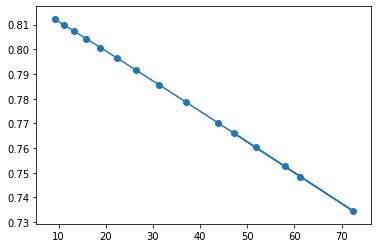

In [181]:
dC_c_g = C_c_g [1:16] - C_c_g[:15]
dC_m_g = C_m_g [1:16] - C_m_g[:15]
a__ = dC_m_g/dC_c_g
alphas = 1 + (a_g-1)/(1+np.exp(-k_g*(dC_c_g-a_date_g)))
plt.plot (dC_c_g, alphas)

plt.scatter (dC_c_g, a__)

In [182]:
print(betas_g)
betas_g2 =np.array([7.e-7, 1.e-14, 7.e-7])

[8.e-07 1.e-07 3.e-07]


In [183]:
S_c_g2, E_c_g2, I_c_g2, R_c_g2, C_c_g2, C_m_g2 = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            [i_cuar, 30], betas_g2, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)

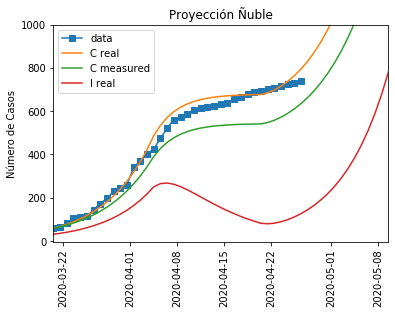

In [184]:
plt.plot (x_plot_data, C_real, label = "data", marker = "s")
plt.plot (x_plot_proy, C_c_g2, label = "C real")
plt.plot (x_plot_proy, C_m_g2, label = "C measured")
plt.plot (x_plot_proy, I_c_g2, label = "I real")
plt.plot ()
plt.xlim (x_plot_proy[0], x_plot_proy[50])
plt.ylim (-5, 1000)
plt.xticks(rotation = 90)
plt.ylabel ("Número de Casos")
plt.title ("Proyección Ñuble")
plt.legend()